# Content
使用数据集
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


# get the datasets path by using example code 


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob 
import pathlib 
for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train'):
    for filename in filenames[:5]:
        print(os.path.join(dirname, filename))

'''
example path
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1513_virus_2632.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0137-0001.jpeg
'''

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1180_virus_2010.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1230_virus_2081.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1513_virus_2632.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person124_virus_238.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person746_virus_1369.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0771-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1294-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0675-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1169-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/che

'\nexample path\n/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1513_virus_2632.jpeg\n/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0137-0001.jpeg\n'

#  import train image 


In [2]:
# get the train folder path
# info:pathlib is a official library
data_dir = pathlib.Path('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train')
# calculate images count
train_image_count = len(list(data_dir.glob("*/*.jpeg")))
print(train_image_count)

5216


# visualize train data 

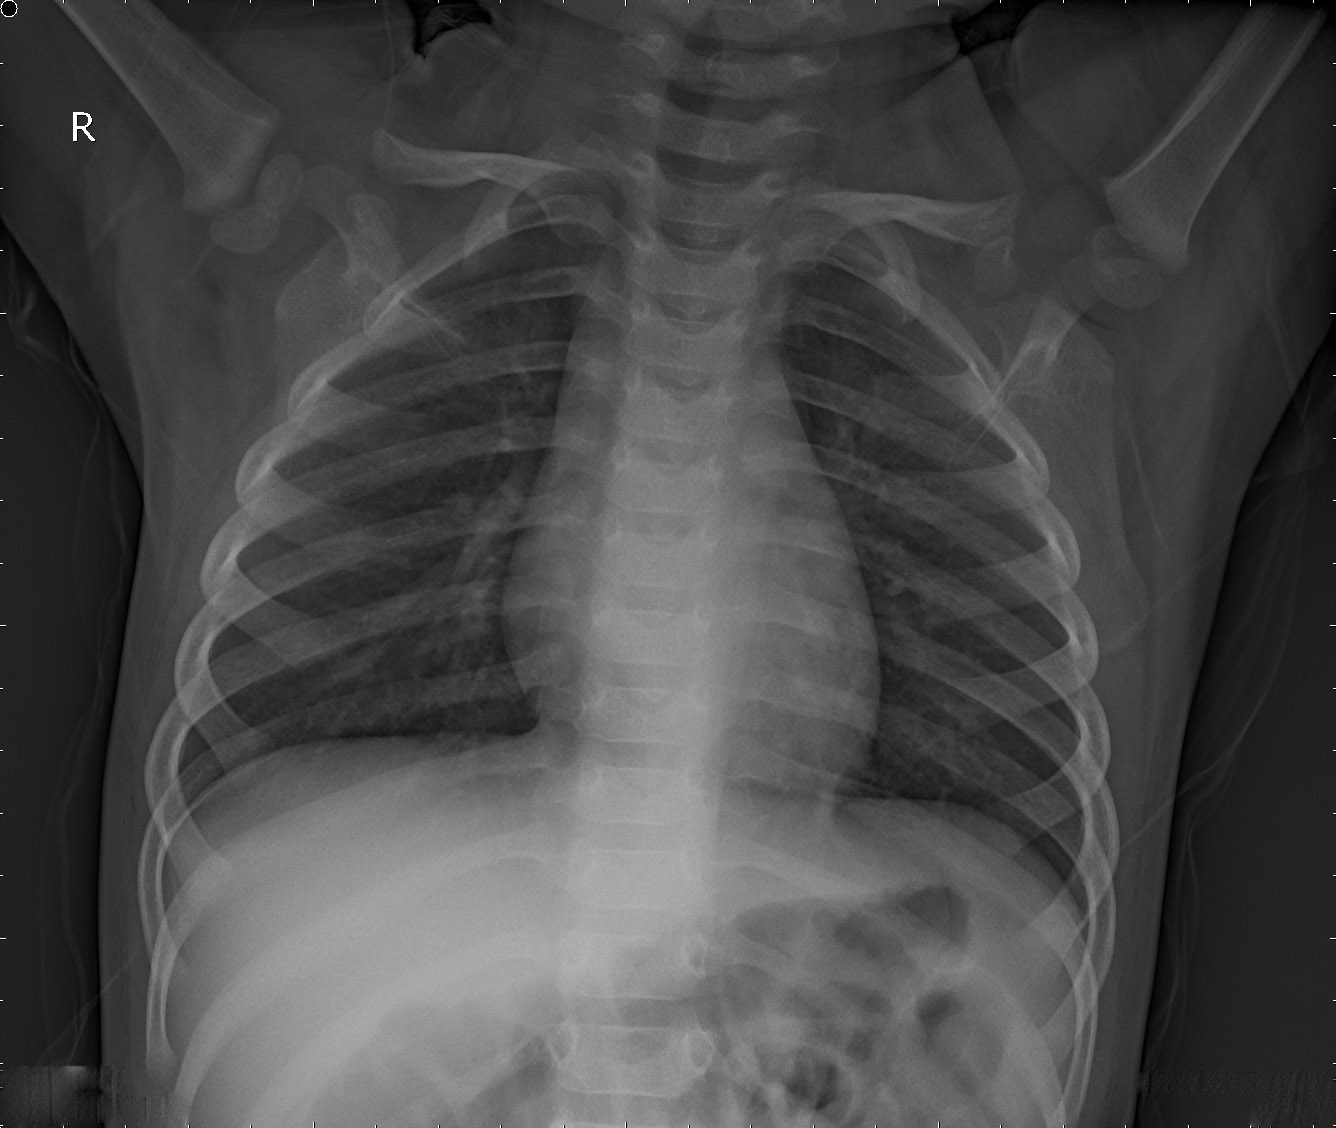

In [3]:
import PIL
normal = list(data_dir.glob('NORMAL/*'))
PIL.Image.open(str(normal[0]))

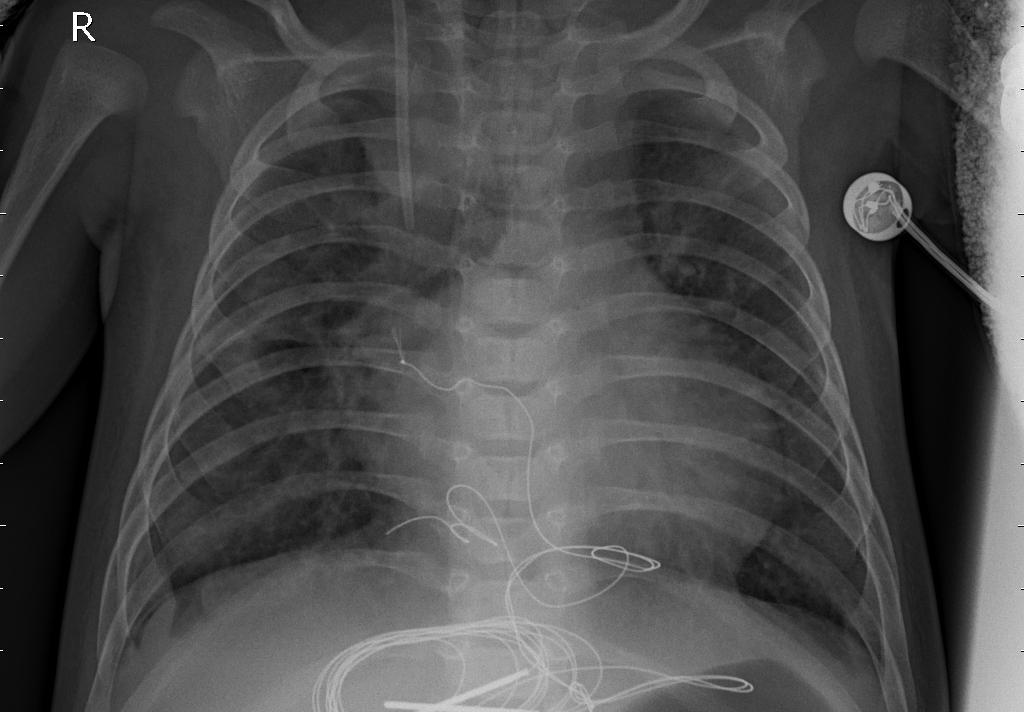

In [4]:
pneumonia = list(data_dir.glob('PNEUMONIA/*'))
PIL.Image.open(str(pneumonia[0]))

# load data using keras api 

In [5]:
batch_size = 64
img_height = 320
img_width  = 320


In [6]:
import tensorflow as tf
# use keras api to set up train datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset = 'training',
    seed=123,
    image_size = (img_height,img_width),
    batch_size = batch_size
    
)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


2022-11-29 14:55:45.867434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 14:55:45.868404: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 14:55:46.181547: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 14:55:46.182441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 14:55:46.183376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset = 'validation',
    seed=123,
    image_size = (img_height,img_width),
    batch_size = batch_size
    
)

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


In [8]:
# get the label classess
class_names = train_ds.class_names 
class_names

['NORMAL', 'PNEUMONIA']

# standardize the data

# build model

In [9]:
for image_path,label_path in train_ds:
    print(image_path.shape)
    print(label_path.shape)
    break

2022-11-29 14:55:54.117755: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(64, 320, 320, 3)
(64,)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Rescaling,MaxPooling2D,Flatten

# output shape
num_classess = len(class_names)

model = Sequential()
model.add(Rescaling(1./255,input_shape = (img_height,img_width,3)))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classess))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 320, 320, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 320, 320, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 160, 160, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 40, 128)       0

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/10


2022-11-29 14:56:06.655295: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


66/66 [==============================] - 68s 756ms/step - loss: 7.6924 - accuracy: 0.7345 - val_loss: 7.6928 - val_accuracy: 0.7766
Epoch 2/10
66/66 [==============================] - 41s 567ms/step - loss: 7.6892 - accuracy: 0.7345 - val_loss: 7.6928 - val_accuracy: 0.7766
Epoch 3/10
66/66 [==============================] - 41s 562ms/step - loss: 7.6892 - accuracy: 0.7345 - val_loss: 7.6928 - val_accuracy: 0.7766
Epoch 4/10
66/66 [==============================] - 41s 567ms/step - loss: 7.6892 - accuracy: 0.7345 - val_loss: 7.6928 - val_accuracy: 0.7766
Epoch 5/10
66/66 [==============================] - 40s 554ms/step - loss: 7.6892 - accuracy: 0.7345 - val_loss: 7.6928 - val_accuracy: 0.7766
Epoch 6/10
66/66 [==============================] - 40s 543ms/step - loss: 7.6892 - accuracy: 0.7345 - val_loss: 7.6928 - val_accuracy: 0.7766
Epoch 7/10
66/66 [==============================] - 39s 549ms/step - loss: 7.6892 - accuracy: 0.7345 - val_loss: 7.6928 - val_accuracy: 0.7766
Epoch 8/10

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


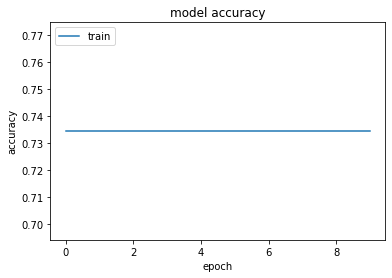

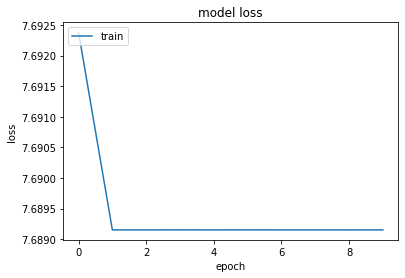

In [14]:
import matplotlib.pyplot as plt 
print(history.history.keys())
"""Accuracy"""
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
"""Loss"""
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# 11.29 report:
损失过大，精度待提高